In [21]:
### Data Preprocessing Script for Diabetes Dataset

import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("data/diabetes2.csv")

# Basic cleaning
df = df.dropna()
df_features  = df.drop("Outcome", axis=1)
df_target = df["Outcome"]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_features)
df_scaled = pd.DataFrame(scaled_features, columns=df_features.columns)
df_processed = pd.concat([df_scaled, df_target.reset_index(drop=True)], axis=1)




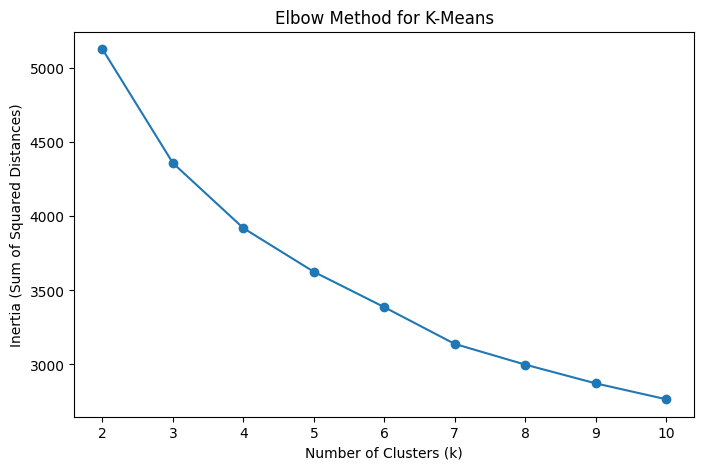

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Feature matrix for clustering
X = df_scaled.values

# Elbow Method (k = 2 to 10)
inertias = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertias, marker="o")
plt.title("Elbow Method for K-Means")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.show()

In [26]:
best_k = 5  # try 4, then 5, then 6

kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X)

# Add cluster labels to your processed df
df_processed["kmeans_cluster"] = cluster_labels



In [27]:
sil_score = silhouette_score(X, cluster_labels)
db_index = davies_bouldin_score(X, cluster_labels)

print(f"K-Means (k={best_k}) Silhouette Score: {sil_score:.3f}")
print(f"K-Means (k={best_k}) Davies-Bouldin Index: {db_index:.3f}")

K-Means (k=5) Silhouette Score: 0.188
K-Means (k=5) Davies-Bouldin Index: 1.626


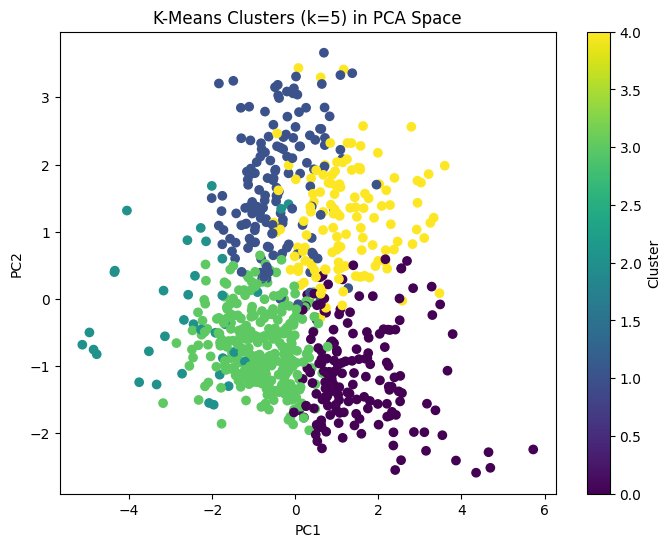

In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.title(f"K-Means Clusters (k={best_k}) in PCA Space")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Cluster")
plt.show()
